# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Amanda Latifa
- **Email:** latifaamanda45@gmail.com
- **ID Dicoding:** amanda_latifa_ouxZ

## Menentukan Pertanyaan Bisnis

saya akan menggunakan 4 stasiun (Dongsi, Wanshouxigong, Changping, Huairou) sebagai perwakilan dari daerah pusat kota, pinggir kota, dan area hijau.
Analisis ini bertujuan untuk mengidentifikasi lokasi dan waktu dengan kualitas udara terburuk sebagai dasar pemahaman pola polusi udara serta faktor-faktor yang memengaruhinya.

- Pertanyaan 1 : Dari keempat stasiun pemantauan (Dongsi, Wanshouxigong, Changping, dan Huairou), stasiun manakah yang memiliki rata-rata kualitas udara terburuk berdasarkan konsentrasi PM2.5 selama periode 2013–2017? Selanjutnya, pada bulan dan tahun berapakah konsentrasi PM2.5 tertinggi terjadi di stasiun tersebut?
- Pertanyaan 2 : Pada stasiun dengan kualitas udara terburuk tersebut, pada jam berapakah rata-rata konsentrasi PM2.5 paling tinggi pada bulan dan tahun terjadinya puncak polusi tersebut?

## Import Semua Packages/Library yang Digunakan

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import os

## Data Wrangling

### Gathering Data

In [50]:
df_changping = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
print("jumlah baris dan kolom:", df_changping.shape)
df_changping.sample(5)

jumlah baris dan kolom: (35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
9827,9828,2014,4,14,11,280.0,309.0,46.0,62.0,1900.0,113.0,22.3,1007.5,10.1,0.0,ESE,2.2,Changping
31916,31917,2016,10,20,20,44.0,44.0,2.0,57.0,1200.0,3.0,10.2,1014.4,9.6,1.5,NW,1.7,Changping
24549,24550,2015,12,18,21,46.0,132.0,17.0,50.0,1400.0,13.0,-0.6,1027.4,-10.3,0.0,NE,0.6,Changping
27272,27273,2016,4,10,8,29.0,186.0,6.0,61.0,900.0,19.0,11.1,1008.1,-6.8,0.0,NW,0.8,Changping
35063,35064,2017,2,28,23,20.0,25.0,6.0,28.0,900.0,54.0,7.0,1009.4,-12.2,0.0,N,1.9,Changping


In [51]:
df_dongsi = pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv')
print("jumlah baris dan kolom:", df_dongsi.shape)
df_dongsi.sample(5)

jumlah baris dan kolom: (35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3220,3221,2013,7,13,4,135.0,100.0,NaN,40.0335,NaN,38.0,23.5,1002.4,23.0,0.0,N,0.0,Dongsi
33444,33445,2016,12,23,12,32.0,34.0,5.0000,27.0000,600.0,42.0,1.5,1027.1,-14.6,0.0,NE,2.2,Dongsi
3480,3481,2013,7,24,0,56.0,91.0,3.1416,32.8480,NaN,83.0,24.0,994.5,21.9,0.0,S,0.7,Dongsi
5775,5776,2013,10,27,15,232.0,254.0,71.0000,154.0000,2100.0,35.0,14.8,1011.9,3.6,0.0,ESE,0.8,Dongsi
30759,30760,2016,9,2,15,5.0,16.0,2.0000,19.0000,400.0,75.0,28.1,998.0,13.6,0.0,NE,1.5,Dongsi


In [52]:
df_huairou = pd.read_csv('data/PRSA_Data_Huairou_20130301-20170228.csv')
print("jumlah baris dan kolom:", df_huairou.shape)
df_huairou.sample(5)

jumlah baris dan kolom: (35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33127,33128,2016,12,10,7,15.0,17.0,2.0,34.0,700.0,14.0,-7.7,1020.8,-11.7,0.0,NW,1.8,Huairou
3407,3408,2013,7,20,23,53.0,116.0,3.0,31.0,900.0,59.0,24.4,996.2,23.4,0.0,NNW,0.5,Huairou
19620,19621,2015,5,27,12,86.0,86.0,9.0,14.0,800.0,208.0,29.5,996.9,14.1,0.0,S,3.5,Huairou
20427,20428,2015,6,30,3,11.0,11.0,2.0,11.0,400.0,16.0,19.7,997.4,14.1,0.0,NNE,1.6,Huairou
33121,33122,2016,12,10,1,25.0,25.0,2.0,14.0,1200.0,26.0,-6.1,1020.9,-9.6,0.0,NW,1.0,Huairou


In [53]:
df_wanshouxigong = pd.read_csv('data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')
print("jumlah baris dan kolom:", df_wanshouxigong.shape)
df_wanshouxigong.head()

jumlah baris dan kolom: (35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Dataset Air Quality berisi data kualitas udara per jam dari beberapa stasiun pemantauan yang tersebar di berbagai distrik di Beijing, China
- masing-masing dataset memiliki 4 jenis kolom utama yang berisi 35.064 baris data
    1. Identitas (No) & waktu (year, month, day, hour)
    2. polutan udara (PM2.5, PM10, SO2, NO2, CO, O3)
    3. Data cuaca (TEMP, PRES, DEWP, RAIN, wd, WSPM)
    4. Lokasi stasiun pengukuran (station) 


### Assessing Data

In [54]:
df_changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [55]:
df_changping.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [56]:
print("Jumlah duplikasi: ", df_changping.duplicated().sum())
df_changping.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [57]:
df_dongsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [58]:
print("Jumlah duplikasi: ", df_dongsi.duplicated().sum())
df_dongsi.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [59]:
df_huairou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [60]:
print("Jumlah duplikasi: ", df_huairou.duplicated().sum())
df_huairou.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


In [61]:
df_wanshouxigong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [62]:
print("Jumlah duplikasi: ", df_wanshouxigong.duplicated().sum())
df_wanshouxigong.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


**Insight:**
- Pada keempat dataset didapat bahwa tidak ada duplikasi namun masing-masing dataset terdapat 12 kolom yang memiliki missing value
- masing-masing kolom pada keempat dataset memiliki tipe data yang sesuai serta tidak terdapat innacurate value

### Cleaning Data

sebelum melakukan cleaning data, saya akan memilih kolom yang dapat menjawab pertanyaan bisnis yakni,
- month sebagai penentu bulan
- year sebagai penentu tahun
- PM2.5 sebagai indikator polusi
- hour sebagai penentu jam
- station

dari keempat kolom tersebut, kolom PM2.5 masih memiliki missing value yang sangat banyak. Oleh karena itu, saya akan mengisi dengan median. Median dipilih karena PM2.5 merupakan data numerik kontinu dengan distribusi yang tidak simetris dan memiliki nilai ekstrem, sehingga median lebih representatif dan tidak terpengaruh oleh outlier dibandingkan mean maupun modus.

In [63]:
df_merge = pd.concat([
    df_dongsi,
    df_wanshouxigong,
    df_changping,
    df_huairou
], ignore_index=True)

kolom_numerik = ["PM2.5", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

df_merge[kolom_numerik] = (
    df_merge
    .groupby("station")[kolom_numerik]
    .transform(lambda x: x.fillna(x.median()))
)

df_merge[kolom_numerik].isnull().sum()

PM2.5    0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

In [64]:
kolom_pilihan = ["month", "year", "station", "PM2.5", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
df_merge[kolom_pilihan].describe()

,month,year,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,6.522930,2014.662560,77.434982,15.513694,46.238988,1201.804315,57.489744,13.397949,1009.854157,2.225217,0.064095,1.777689
std,3.448715,1.177201,78.929180,21.713074,32.495678,1091.286814,55.380383,11.498270,10.502249,13.847831,0.796633,1.252272
min,1.000000,2013.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,4.000000,2014.000000,20.000000,2.000000,22.000000,500.000000,14.000000,3.000000,1001.400000,-9.300000,0.000000,0.900000
50%,7.000000,2015.000000,53.000000,7.000000,39.000000,900.000000,46.000000,14.400000,1009.400000,2.700000,0.000000,1.400000
75%,10.000000,2016.000000,107.000000,19.000000,64.000000,1500.000000,80.000000,23.100000,1018.000000,14.900000,0.000000,2.200000
max,12.000000,2017.000000,999.000000,411.000000,258.000000,10000.000000,1071.000000,41.400000,1042.000000,29.100000,52.100000,13.200000


jika dilihat dari nilai min dan max, kolom PM2.5 memiliki nilai mean yg jauh dari rentang nilai data dan memiliki standar deviasi yang sangat besar. Dari sini saya dapat mengambil kesimpulan bahwa kolom PM2.5 memiliki outlier dan harus ditangani

In [65]:
def hitung_outlier(data):
    kolom_numerik = ["PM2.5", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

    Q1 = data[kolom_numerik].quantile(0.25)
    Q3 = data[kolom_numerik].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data = data.copy()
    data["outlier"] = (
        (data[kolom_numerik] < lower) |
        (data[kolom_numerik] > upper)
    ).any(axis=1)

    return data

df_outlier = df_merge.groupby("station", group_keys=False).apply(hitung_outlier)
outlier_per_station = (
    df_outlier.groupby("station")["outlier"]
    .sum()
    .reset_index(name="jumlah_outlier")
)

outlier_per_station



C:\Users\Hasan Abdurrahman\AppData\Local\Temp\ipykernel_14732\2619627738.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_outlier = df_merge.groupby("station", group_keys=False).apply(hitung_outlier)


,station,jumlah_outlier
0,Changping,10428
1,Dongsi,8803
2,Huairou,10588
3,Wanshouxigong,9070


In [66]:
def hapus_outlier(data, kolom_numerik, max_iterasi=10):
    for _ in range(max_iterasi):
        Q1 = data[kolom_numerik].quantile(0.25)
        Q3 = data[kolom_numerik].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        bersih = (
            (data[kolom_numerik] >= lower) &
            (data[kolom_numerik] <= upper)
        ).all(axis=1)

        data_bersih = data[bersih]

        if len(data_bersih) == len(data):
            break

        data = data_bersih

    return data

df_clean_iter = (
    df_merge.groupby("station", group_keys=False).apply(hapus_outlier, kolom_numerik)
)

C:\Users\Hasan Abdurrahman\AppData\Local\Temp\ipykernel_14732\2474968670.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_merge.groupby("station", group_keys=False).apply(hapus_outlier, kolom_numerik)


In [67]:
def hitung_outlier(data):
    kolom_numerik = ["PM2.5", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

    Q1 = data[kolom_numerik].quantile(0.25)
    Q3 = data[kolom_numerik].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data = data.copy()
    data["outlier"] = (
        (data[kolom_numerik] < lower) |
        (data[kolom_numerik] > upper)
    ).any(axis=1)

    return data

df_outlier = df_clean_iter.groupby("station", group_keys=False).apply(hitung_outlier)
outlier_per_station = (
    df_outlier.groupby("station")["outlier"]
    .sum()
    .reset_index(name="jumlah_outlier")
)

outlier_per_station

C:\Users\Hasan Abdurrahman\AppData\Local\Temp\ipykernel_14732\1562513624.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_outlier = df_clean_iter.groupby("station", group_keys=False).apply(hitung_outlier)


,station,jumlah_outlier
0,Changping,0
1,Dongsi,0
2,Huairou,0
3,Wanshouxigong,0


**Insight:**
- kolom PM2.5 memiliki banyak outlier yang harus ditangani lebih lanjut
- dikarenakan outlier yang cukup ekstrem maka dilakukan iterasi pada penghapusan outlier

## Exploratory Data Analysis (EDA)

### Explore data

In [68]:
df_clean_iter[kolom_pilihan].describe(include='all')

,month,year,station,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,63035.000000,63035.000000,63035,63035.000000,63035.000000,63035.000000,63035.000000,63035.000000,63035.000000,63035.000000,63035.000000,63035.0,63035.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Dongsi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.753788,2014.774855,NaN,36.503457,5.568857,34.527071,682.191640,54.835299,15.384228,1009.198260,3.690769,0.0,1.618087
std,3.050309,1.159523,NaN,28.761297,4.911569,21.219247,341.364379,37.024830,10.771060,10.823705,14.090823,0.0,0.877218
min,1.000000,2013.000000,NaN,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-34.500000,0.0,0.000000
25%,4.000000,2014.000000,NaN,13.000000,2.000000,18.000000,400.000000,27.000000,7.100000,1000.700000,-8.500000,0.0,1.000000
50%,7.000000,2015.000000,NaN,28.000000,3.000000,31.000000,600.000000,49.000000,17.600000,1007.800000,6.600000,0.0,1.400000
75%,9.000000,2016.000000,NaN,54.000000,7.000000,47.000000,900.000000,78.000000,24.000000,1017.600000,16.100000,0.0,2.100000


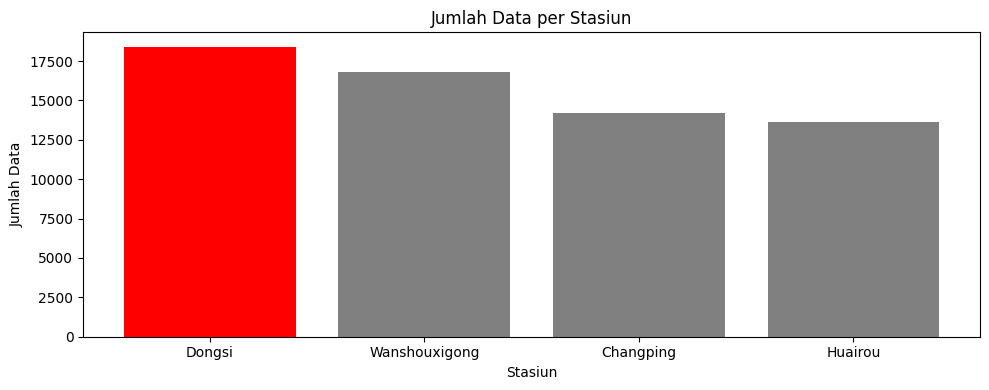

In [69]:
station_count = df_clean_iter["station"].value_counts()
max_value = station_count.max()
warna = [
    "red" if value == max_value else "gray"
    for value in station_count.values
]
plt.figure(figsize=(10, 4))
plt.bar(
    station_count.index,
    station_count.values,
    color=warna
)

plt.title("Jumlah Data per Stasiun")
plt.xlabel("Stasiun")
plt.ylabel("Jumlah Data")
plt.tight_layout()
plt.show()

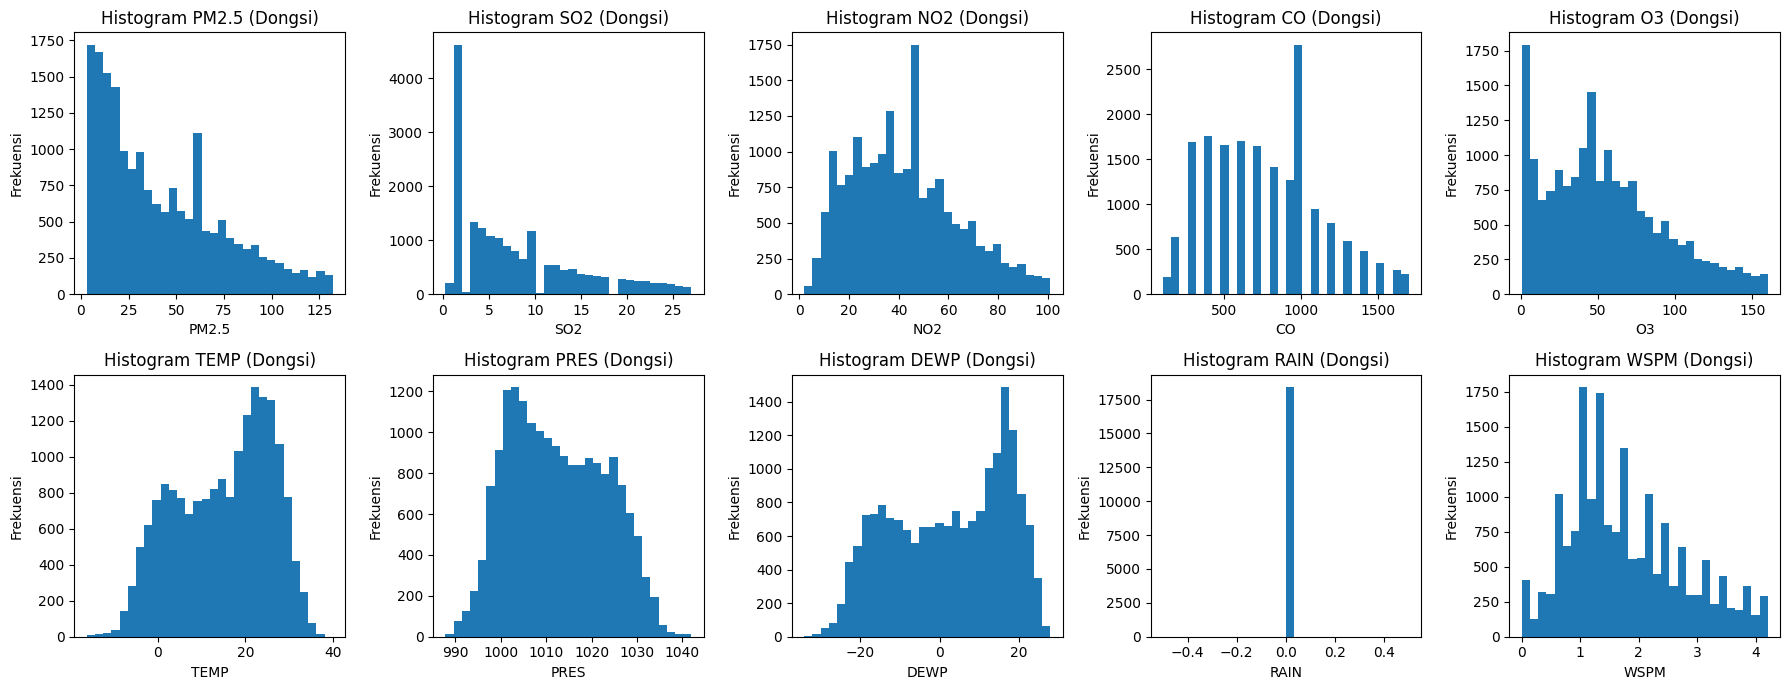

In [70]:
df_dongsi = df_clean_iter[df_clean_iter["station"] == "Dongsi"]

fig, axes = plt.subplots(2, 5, figsize=(18, 7))
axes = axes.flatten()

for i, kolom in enumerate(kolom_numerik):
    axes[i].hist(df_dongsi[kolom].dropna(), bins=30)
    axes[i].set_title(f"Histogram {kolom} (Dongsi)")
    axes[i].set_xlabel(kolom)
    axes[i].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()

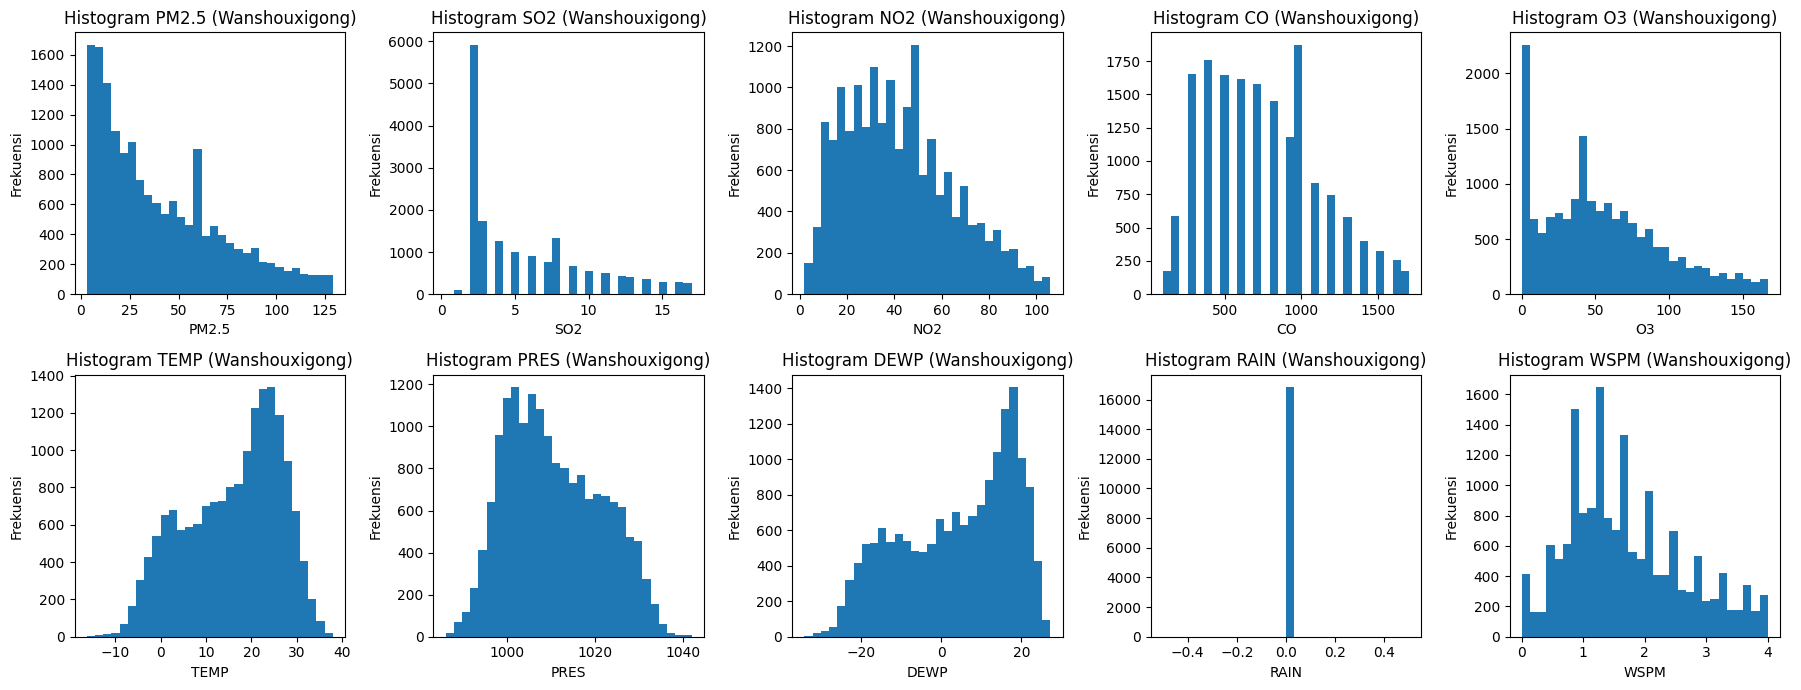

In [71]:
df_dongsi = df_clean_iter[df_clean_iter["station"] == "Wanshouxigong"]

fig, axes = plt.subplots(2, 5, figsize=(18, 7))
axes = axes.flatten()

for i, kolom in enumerate(kolom_numerik):
    axes[i].hist(df_dongsi[kolom].dropna(), bins=30)
    axes[i].set_title(f"Histogram {kolom} (Wanshouxigong)")
    axes[i].set_xlabel(kolom)
    axes[i].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()

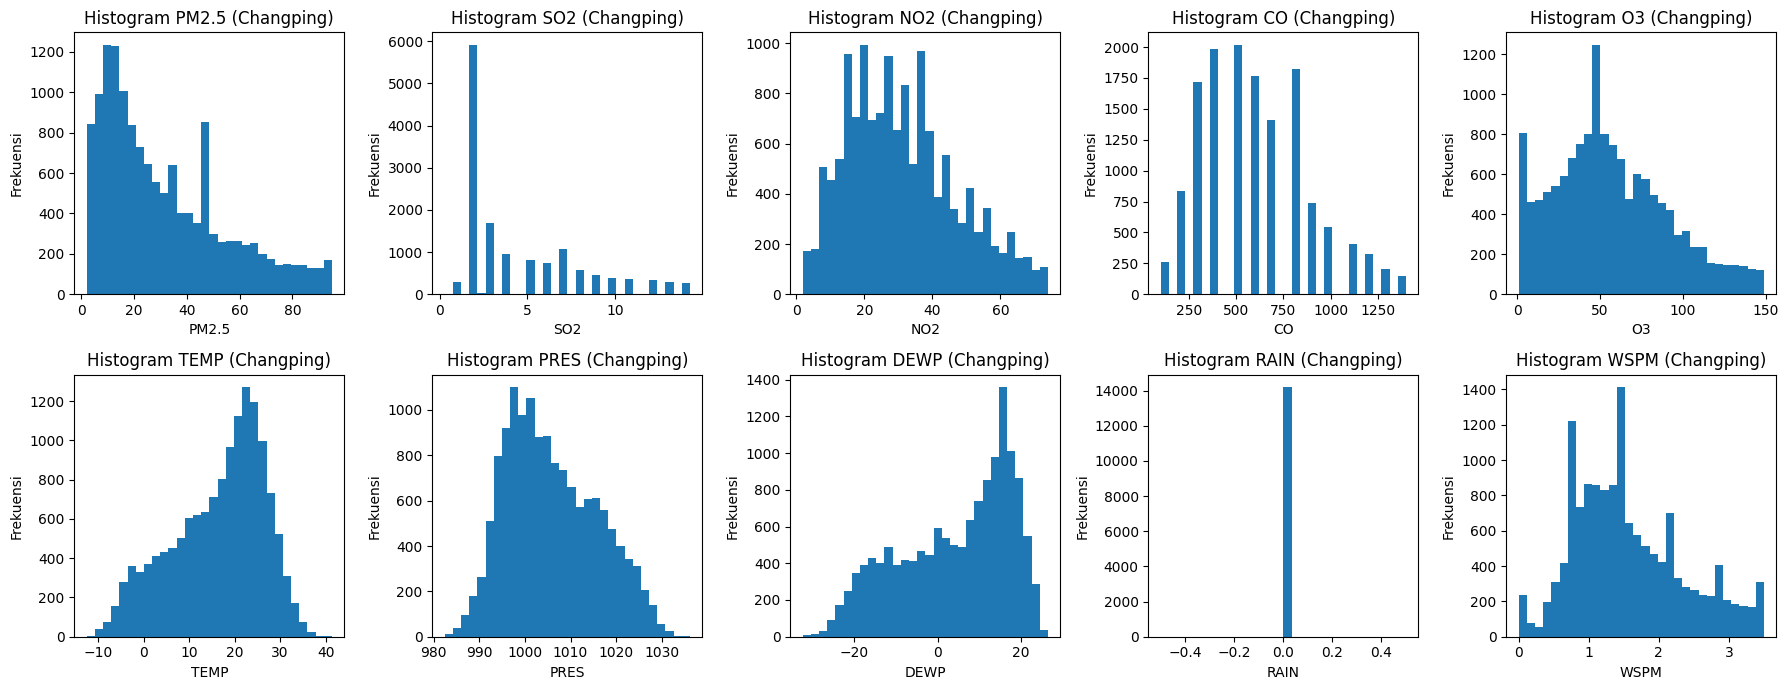

In [72]:
df_dongsi = df_clean_iter[df_clean_iter["station"] == "Changping"]

fig, axes = plt.subplots(2, 5, figsize=(18, 7))
axes = axes.flatten()

for i, kolom in enumerate(kolom_numerik):
    axes[i].hist(df_dongsi[kolom].dropna(), bins=30)
    axes[i].set_title(f"Histogram {kolom} (Changping)")
    axes[i].set_xlabel(kolom)
    axes[i].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()

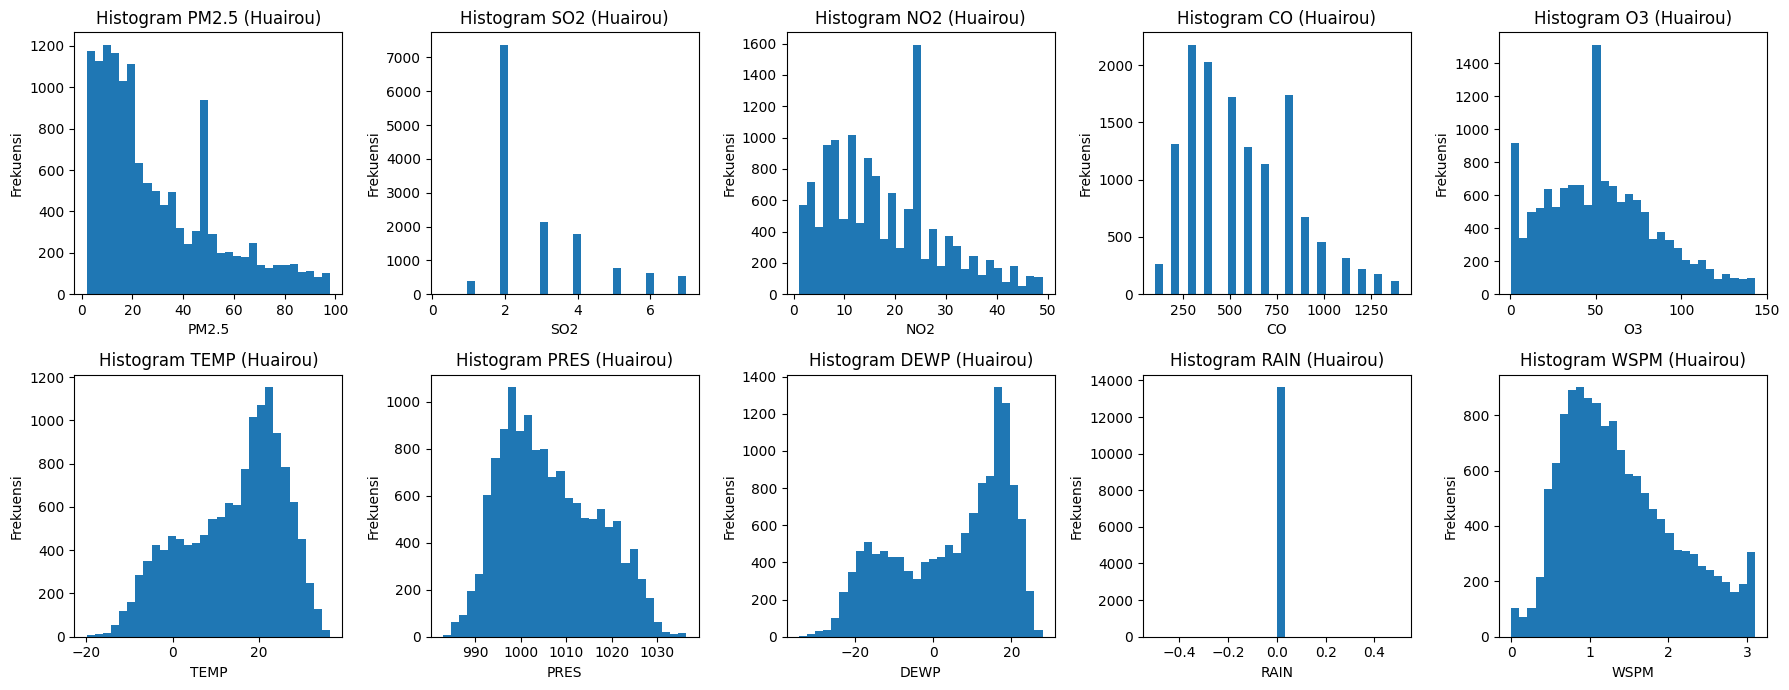

In [73]:
df_dongsi = df_clean_iter[df_clean_iter["station"] == "Huairou"]

fig, axes = plt.subplots(2, 5, figsize=(18, 7))
axes = axes.flatten()

for i, kolom in enumerate(kolom_numerik):
    axes[i].hist(df_dongsi[kolom].dropna(), bins=30)
    axes[i].set_title(f"Histogram {kolom} (Huairou)")
    axes[i].set_xlabel(kolom)
    axes[i].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()

**Insight:**
- setelah dilakukan analisis dengan descriptive statistic, didapat bahwa stasiun Dongsi memiliki data terbanyak. Hal ini dibuktikan melalui visualisasi barchart yang menunjukkan distribusi jumlah data antar stasiun yang tidak seimbang, di mana Stasiun Dongsi memiliki jumlah observasi paling banyak.
- Selain itu, dari analisis descriptive statistic didapat pula bahwa sebagian besar kolom memiliki rata-rata nilai (mean) yang lebih besar dari nilai tengahnya (median). Hal ini dibuktikan dengan visualisasi histogram masing-masing data pada keempat stasiun yang menunjukkan bahwa "PM2.5", "SO2", "NO2", "CO", "O3", "PRES", "WSPM" memiliki bentuk sebaran ke kanan (right skewed) sedangkan ""TEMP" dan "DEWP" left skewed serta "RAIN" yang hanya memiliki nilai 0.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dari keempat stasiun pemantauan, stasiun manakah yang memiliki rata-rata kualitas udara terburuk berdasarkan konsentrasi PM2.5 selama periode 2013–2017? Selanjutnya, pada bulan dan tahun berapakah konsentrasi PM2.5 tertinggi terjadi di stasiun tersebut?

In [74]:
rata_pm25_station = (df_clean_iter.groupby("station")["PM2.5"].mean().sort_values(ascending=False))
rata_pm25_station

station
Dongsi           42.052654
Wanshouxigong    40.551774
Changping        31.336825
Huairou          29.388072
Name: PM2.5, dtype: float64

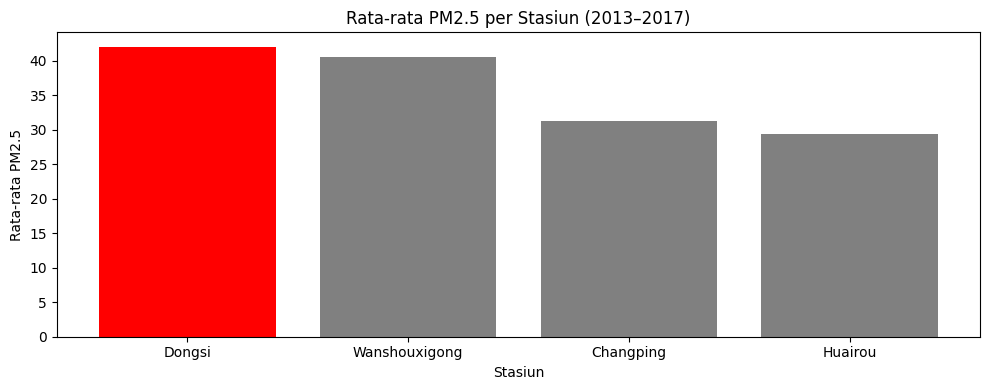

In [82]:
max_value = rata_pm25_station.max()
warna = [
    "red" if value == max_value else "gray"
    for value in rata_pm25_station.values
]

plt.figure(figsize=(10, 4))
plt.bar(
    rata_pm25_station.index,
    rata_pm25_station.values,
    color=warna
)

plt.title("Rata-rata PM2.5 per Stasiun (2013–2017)")
plt.xlabel("Stasiun")
plt.ylabel("Rata-rata PM2.5")
plt.tight_layout()
plt.show()

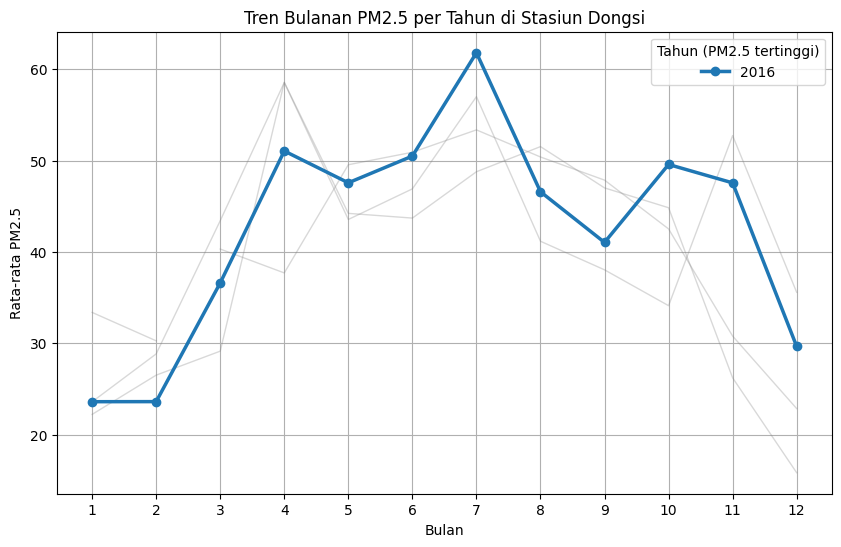

In [76]:
pm25_line = (
    df_clean_iter.groupby(["station", "year", "month"])["PM2.5"].mean().reset_index()
)

station_name = "Dongsi"
df_plot = pm25_line[pm25_line["station"] == station_name]

max_pm25 = df_plot["PM2.5"].max()
tahun_tertinggi = df_plot[df_plot["PM2.5"] == max_pm25]["year"].unique()

plt.figure(figsize=(10, 6))
for year in sorted(df_plot["year"].unique()):
    yearly_data = df_plot[df_plot["year"] == year]

    if year in tahun_tertinggi:
        plt.plot(
            yearly_data["month"],
            yearly_data["PM2.5"],
            marker="o",
            linewidth=2.5,
            label=str(year)
        )
    else:
        plt.plot(
            yearly_data["month"],
            yearly_data["PM2.5"],
            color="gray",
            alpha=0.3,
            linewidth=1
        )

plt.title(f"Tren Bulanan PM2.5 per Tahun di Stasiun {station_name}")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata PM2.5")
plt.xticks(range(1, 13))
plt.legend(title="Tahun (PM2.5 tertinggi)")
plt.grid(True)
plt.show()


### Pertanyaan 2: Pada stasiun dengan kualitas udara terburuk tersebut, pada jam berapakah rata-rata konsentrasi PM2.5 paling tinggi pada bulan dan tahun terjadinya puncak polusi tersebut?

In [77]:
bulan_terburuk = 7
tahun_terburuk = 2016
station_pilihan = "Dongsi"

df_waktu_terburuk = df_clean_iter[
    (df_clean_iter["month"] == bulan_terburuk) &
    (df_clean_iter["year"] == tahun_terburuk) &
    (df_clean_iter["station"] == station_pilihan)
]

pm25_per_jam = df_waktu_terburuk.groupby("hour")["PM2.5"].mean() 
jam_terburuk = pm25_per_jam.idxmax()
nilai_pm25 = pm25_per_jam.max()

print(
    f"Jam terburuk: {int(jam_terburuk)}:00 "
    f"dengan rata-rata PM2.5 = {nilai_pm25:.2f}"
)



Jam terburuk: 0:00 dengan rata-rata PM2.5 = 67.73


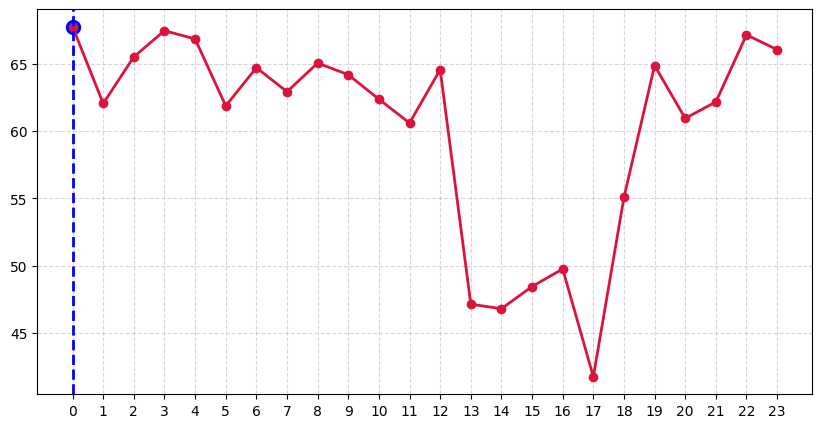

In [78]:
plt.figure(figsize=(10,5))
plt.plot(pm25_per_jam.index, pm25_per_jam.values, marker='o', color='crimson', linewidth=2)
plt.axvline(jam_terburuk, color='blue', linestyle='--', linewidth=2)
plt.scatter(jam_terburuk, nilai_pm25, color='blue', s=100)
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Insight:**
- Stasiun Dongsi, yang berada di pusat Kota Beijing, mencatat rata-rata konsentrasi PM2.5 tertinggi dibandingkan tiga stasiun lainnya selama periode 2013–2017. Hal ini menunjukkan bahwa wilayah pusat kota memiliki tingkat polusi udara yang lebih tinggi secara konsisten. Dalam periode tersebut, kondisi kualitas udara terburuk di Stasiun Dongsi tercatat pada bulan Juli 2016, yang ditandai dengan peningkatan signifikan konsentrasi PM2.5.
- Analisis lanjutan pada bulan Juli 2016 menunjukkan bahwa tingkat polusi PM2.5 tertinggi terjadi pada pukul 00.00, dengan nilai rata-rata konsentrasi sebesar 67,73, yang mengindikasikan kondisi kualitas udara yang sangat buruk pada jam tersebut.

## Analisis Lanjutan (Opsional)

Geospatial Analysis : Analisis faktor lingkungan berbasis lokasi

In [79]:
df_filter = df_clean_iter[
    (df_clean_iter["year"] == 2016) &
    (df_clean_iter["month"] == 7) &
    (df_clean_iter["hour"] == 0) & 
    (df_clean_iter["station"] == "Dongsi")
]

kolom_target = "PM2.5"
kolom_faktor = ["SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
df_faktor = df_filter[kolom_faktor + [kolom_target]]
corr = df_faktor.corr()
if kolom_target in corr.columns:
    corr_target = (
        corr[kolom_target]
        .drop(kolom_target)
        .sort_values(ascending=False)
    )

    print(f"\nKorelasi fitur terhadap target '{kolom_target}':")
    display(corr_target.to_frame(name="corr_with_PM2.5").round(3))



Korelasi fitur terhadap target 'PM2.5':


,corr_with_PM2.5
CO,0.572
DEWP,0.540
O3,0.298
TEMP,0.244
PRES,0.137
SO2,0.046
NO2,-0.002
WSPM,-0.126
RAIN,NaN


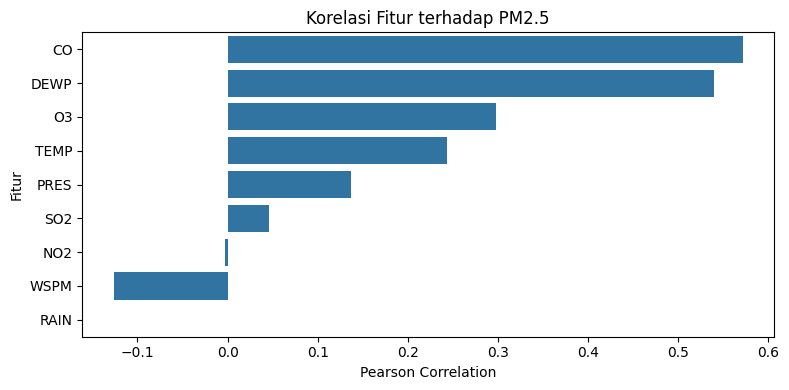

In [80]:
import seaborn as sns

plt.figure(figsize=(8, max(4, 0.35 * len(corr_target))))
sns.barplot(
    x=corr_target.values,
    y=corr_target.index
)
plt.title("Korelasi Fitur terhadap PM2.5")
plt.xlabel("Pearson Correlation")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()


Berdasarkan hasil analisis, tingginya konsentrasi PM2.5 pada pukul 00.00 di bulan Juli 2016 dipengaruhi oleh faktor emisi pembakaran yang direpresentasikan oleh CO serta tingginya kelembapan udara yang ditunjukkan oleh nilai dew point (DEWP). Sementara itu, kecepatan angin (WSPM) menunjukkan korelasi yang sangat lemah, mengindikasikan bahwa pada malam hari kondisi angin relatif rendah dan stabil sehingga proses dispersi polutan tidak berlangsung secara optimal.

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan hasil analisis data kualitas udara periode 2013–2017, Stasiun Dongsi yang berada di pusat Kota Beijing merupakan stasiun dengan rata-rata konsentrasi PM2.5 tertinggi dibandingkan tiga stasiun pemantauan lainnya. Temuan ini menunjukkan bahwa wilayah pusat kota cenderung mengalami tingkat polusi udara yang lebih buruk secara konsisten. Puncak konsentrasi PM2.5 tertinggi di stasiun tersebut terjadi pada bulan Juli 2016, yang menandakan periode dengan kualitas udara terburuk selama rentang waktu pengamatan.
    - Saran/Rekomendasi Pertanyaan 1: Pemerintah daerah dan instansi terkait disarankan untuk memprioritaskan pengendalian polusi udara di wilayah pusat kota, khususnya di sekitar Stasiun Dongsi. Upaya yang dapat dipertimbangkan antara lain pembatasan emisi kendaraan bermotor, pengawasan aktivitas industri, serta peningkatan ruang terbuka hijau untuk menekan akumulasi polutan PM2.5.

- Conclution pertanyaan 2 : Analisis lanjutan pada periode puncak polusi menunjukkan bahwa di Stasiun Dongsi, rata-rata konsentrasi PM2.5 tertinggi pada bulan Juli 2016 terjadi pada pukul 00.00, dengan nilai mencapai 67,73 µg/m³. Hal ini mengindikasikan bahwa kondisi kualitas udara terburuk terjadi pada malam hari, ketika aktivitas dispersi polutan cenderung menurun.
    - Saran/Rekomendasi Pertanyaan 2: Disarankan agar pemantauan kualitas udara secara intensif dilakukan pada malam hingga dini hari, terutama pada musim dengan potensi polusi tinggi. Informasi ini dapat dimanfaatkan untuk sistem peringatan dini (early warning system) agar masyarakat, khususnya kelompok rentan, dapat mengurangi aktivitas luar ruangan pada jam-jam tersebut.

- Conclution Lanjutan : Peningkatan konsentrasi PM2.5 pada pukul 00.00 di bulan Juli 2016 di Stasiun Dongsi dipengaruhi oleh kombinasi beberapa faktor lingkungan. Tingginya nilai CO menunjukkan dominasi emisi pembakaran, sementara kelembapan udara yang tinggi (ditunjukkan oleh nilai dew point/DEWP) mempercepat proses akumulasi partikel di udara. Di sisi lain, kecepatan angin (WSPM) yang rendah menyebabkan proses dispersi polutan tidak berjalan optimal, sehingga partikel PM2.5 terperangkap di dekat permukaan.
    - Saran/Rekomendasi Analisis Lanjutan: Stakeholder disarankan untuk mempertimbangkan pendekatan berbasis kondisi meteorologi dalam pengelolaan kualitas udara, seperti pengaturan aktivitas pembakaran dan transportasi pada malam hari, terutama saat kelembapan tinggi dan kecepatan angin rendah. Selain itu, integrasi data meteorologi dengan kebijakan pengendalian emisi dapat membantu meminimalkan risiko akumulasi polutan pada periode rawan.

In [ ]:
df_clean_iter.to_csv("dashboard/main_data.csv", index=False)